In [1]:
%matplotlib inline

import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## plot KEGG BRITE level 3

In [2]:
ko_l1 = pd.read_csv('../brite/KEGG_pathways_to_level_1.tsv', sep='\t', header=None)
ko_l2 = pd.read_csv('../brite/KEGG_pathways_to_level_2.tsv', sep='\t', header=None)
ko_info = pd.read_csv('../brite/KEGG_pathways_to_info_sep62020.tsv', sep='\t', header=None)

ko2l1=dict(zip(ko_l1[0],ko_l1[1]))
ko2l2=dict(zip(ko_l2[0],ko_l2[1]))
ko2l3=dict(zip(ko_info[0],ko_info[1]))

In [3]:
lefse_res = pd.read_csv('../input_data/LEfSe_input_ko_level_3.txt', sep='\t', index_col=0, header=None)
lefse_res.columns = ['log average','Class','LDA','p-value']
lefse_res.sort_values('LDA', inplace=True)
lefse_res.dropna(inplace=True)

In [4]:
digesta_lda = (-lefse_res['LDA'][lefse_res['Class']=='Digesta']).sort_values()
digesta_label = lefse_res.index[lefse_res['Class']=='Digesta']
digesta_label = digesta_label[::-1]

tissue_lda = lefse_res['LDA'][lefse_res['Class']=='Tissue']
tissue_label = lefse_res.index[lefse_res['Class']=='Tissue']

ko00072: Synthesis and degradation of ketone bodies - Lipid metabolism - Metabolism
ko00983: Drug metabolism - other enzymes - Xenobiotics biodegradation and metabolism - Metabolism
ko00511: Other glycan degradation - Glycan biosynthesis and metabolism - Metabolism
ko00281: Geraniol degradation - Metabolism of terpenoids and polyketides - Metabolism
ko00280: Valine, leucine and isoleucine degradation - Amino acid metabolism - Metabolism
ko00660: C5-Branched dibasic acid metabolism - Carbohydrate metabolism - Metabolism
ko03010: Ribosome - Translation - Genetic Information Processing
ko00540: Lipopolysaccharide biosynthesis - Glycan biosynthesis and metabolism - Metabolism
ko00450: Selenocompound metabolism - Metabolism of other amino acids - Metabolism
ko00020: Citrate cycle (TCA cycle) - Carbohydrate metabolism - Metabolism
ko00970: Aminoacyl-tRNA biosynthesis - Translation - Genetic Information Processing
ko00290: Valine, leucine and isoleucine biosynthesis - Amino acid metabolism - 

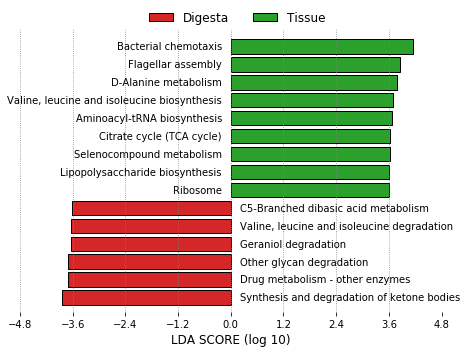

In [5]:
fig, ax = plt.subplots(figsize=(7,5))

ax.barh(digesta_label, digesta_lda,
        label='Digesta',edgecolor='k', color='tab:red')

ax.barh(tissue_label, tissue_lda,
        label='Tissue',edgecolor='k', color='tab:green')
    
ax.legend(ncol=2, fontsize=12,
          edgecolor='w', facecolor='w',
          bbox_to_anchor=(0.75,1.1))

for index, ko in enumerate(digesta_label):
    plt.text(0.2,index, ko2l3[ko], va='center', ha='left')
    print('{}: {} - {} - {}'.format(ko,ko2l3[ko],ko2l2[ko],ko2l1[ko]))


for index, ko in enumerate(tissue_label):
    plt.text(-0.2,index+len(digesta_label), ko2l3[ko], va='center', ha='right')
    print('{}: {} - {} - {}'.format(ko,ko2l3[ko],ko2l2[ko],ko2l1[ko]))

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(-4.8,4.9,1.2))
ax.set_axisbelow(False)
ax.tick_params(axis='x', labelsize=10)
ax.set_yticks([])

ax.set_facecolor('w')
plt.grid(axis='x',c='gray', ls=':')
plt.xlabel('LDA SCORE (log 10)',fontsize=12)

# plt.xlim(0,5)
plt.ylim(-0.8,len(lefse_res.index))

plt.tight_layout()

plt.savefig('../figures/lefse-digesta-tissue-BRITE-level-3.png', dpi=600)
plt.show()

## plot KEGG BRITE level 2

In [6]:
lefse_res = pd.read_csv('../input_data/LEfSe_input_ko_level_2.txt', sep='\t', index_col=0, header=None)
lefse_res.columns = ['log average','Class','LDA','p-value']
lefse_res.sort_values('LDA', inplace=True)
lefse_res.dropna(inplace=True)

In [7]:
digesta_lda = (-lefse_res['LDA'][lefse_res['Class']=='Digesta']).sort_values()
digesta_label = lefse_res.index[lefse_res['Class']=='Digesta']
digesta_label = digesta_label[::-1]

tissue_lda = lefse_res['LDA'][lefse_res['Class']=='Tissue']
tissue_label = lefse_res.index[lefse_res['Class']=='Tissue']

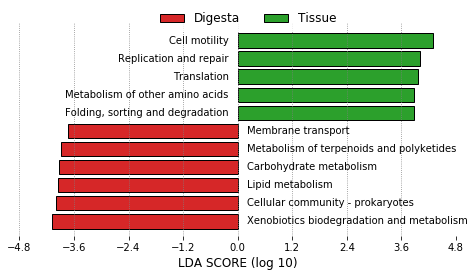

In [8]:
fig, ax = plt.subplots(figsize=(7,3.95))

ax.barh(digesta_label, digesta_lda,
        label='Digesta',edgecolor='k', color='tab:red')

ax.barh(tissue_label, tissue_lda,
        label='Tissue',edgecolor='k', color='tab:green')
    
ax.legend(ncol=2, fontsize=12,
          edgecolor='w', facecolor='w',
          bbox_to_anchor=(0.75,1.1))

for index, level_2 in enumerate(digesta_label):
    plt.text(0.2,index, level_2.replace('__',' '), va='center', ha='left')


for index, level_2 in enumerate(tissue_label):
    plt.text(-0.2,index+len(digesta_label), level_2.replace('__',' '), va='center', ha='right')


ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(-4.8,4.9,1.2))
ax.set_axisbelow(False)
ax.tick_params(axis='x', labelsize=10)
ax.set_yticks([])

ax.set_facecolor('w')
plt.grid(axis='x',c='gray', ls=':')
plt.xlabel('LDA SCORE (log 10)',fontsize=12)

# plt.xlim(0,5)
plt.ylim(-0.8,len(lefse_res.index))

plt.tight_layout()

plt.savefig('../figures/lefse-digesta-tissue-BRITE-level-2.png', dpi=600)
plt.show()